<a href="https://colab.research.google.com/github/shumshersubashgautam/2MobileNetV2-BreastCancer/blob/master/govindadai(sleepdeprivation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.optimizers import Adam, SGD

from keras.layers import Flatten, Dropout, BatchNormalization, Reshape, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.image as mpimg

import shutil
import os

Using TensorFlow backend.


In [0]:
images_folder = os.listdir("/content/gdrive/My Drive/acuresearchFeaturedengineered")

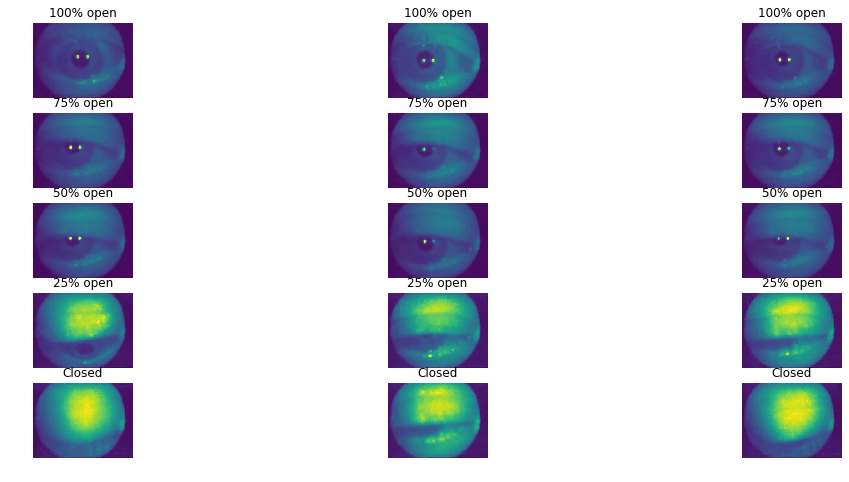

In [0]:
first_folder = images_folder[0]
benign_images_first_folder = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/1'
benign_images = os.listdir(benign_images_first_folder)[0:3]
malignant_images_first_folder = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/2'
malignant_images = os.listdir(malignant_images_first_folder)[0:3]
malignant_images_first_folder1 = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/3'
malignant_images1 = os.listdir(malignant_images_first_folder1)[0:3]
malignant_images_first_folder2 = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/4'
malignant_images2 = os.listdir(malignant_images_first_folder2)[0:3]
malignant_images_first_folder3 = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/5'
malignant_images3 = os.listdir(malignant_images_first_folder3)[0:3]

def plot_images(image_index, folder_name, image_name, title):
  sp = figure.add_subplot(5, 3, image_index + 1)
  sp.axis('Off')
  image_path = f'{folder_name}/{image_name}'
  image_loaded = img=mpimg.imread(image_path)
  sp.set_title(title, fontsize=12)
  plt.imshow(image_loaded, interpolation=None)

figure = plt.figure(figsize=(18, 8))

for image_index, image_name in enumerate(benign_images):
  plot_images(image_index, benign_images_first_folder, image_name, "100% open")

for image_index, image_name in enumerate(malignant_images):
  plot_images(image_index + 3, malignant_images_first_folder, image_name, "75% open")
for image_index, image_name in enumerate(malignant_images1):
  plot_images(image_index + 6, malignant_images_first_folder1, image_name, "50% open")   
for image_index, image_name in enumerate(malignant_images2):
  plot_images(image_index + 9, malignant_images_first_folder2, image_name, "25% open")
for image_index, image_name in enumerate(malignant_images3):
  plot_images(image_index + 12, malignant_images_first_folder3, image_name, "Closed")              

In [0]:
!mkdir training && mkdir validation

In [0]:
!mkdir training/1 && mkdir training/2

In [0]:
!mkdir training/3 && mkdir training/4

In [0]:
!mkdir training/5 

In [0]:
!mkdir validation/1 && mkdir validation/2

In [0]:
!mkdir validation/3 && mkdir validation/4

In [0]:
!mkdir validation/5

In [0]:
benign_images_training_folder_name = "training/1"
malignant_images_training_folder_name = "training/2"
malignant_images_training_folder_name1 = "training/3"
malignant_images_training_folder_name2 = "training/4"
malignant_images_training_folder_name3 = "training/5"

In [0]:
for folder in images_folder:
  benign_folder = os.listdir(f'/content/gdrive/My Drive/acuresearchFeaturedengineered/1/')
  malignant_folder = os.listdir(f'/content/gdrive/My Drive/acuresearchFeaturedengineered/2/')
  malignant_folder1 = os.listdir(f'/content/gdrive/My Drive/acuresearchFeaturedengineered/3/')
  malignant_folder2 = os.listdir(f'/content/gdrive/My Drive/acuresearchFeaturedengineered/4/')
  malignant_folder3 = os.listdir(f'/content/gdrive/My Drive/acuresearchFeaturedengineered/5/')
  
  for benign_image in benign_folder:
    image_url = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/1/{benign_image}'
    shutil.move(image_url, benign_images_training_folder_name)
    
  for malign_image in malignant_folder:
    image_url = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/2/{malign_image}'
    shutil.copy(image_url, malignant_images_training_folder_name)
  for malign_image1 in malignant_folder1:
    image_url = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/3/{malign_image1}'
    shutil.copy(image_url, malignant_images_training_folder_name1) 
  for malign_image2 in malignant_folder2:
    image_url = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/4/{malign_image2}'
    shutil.copy(image_url, malignant_images_training_folder_name2) 
  for malign_image3 in malignant_folder3:
    image_url = f'/content/gdrive/My Drive/acuresearchFeaturedengineered/5/{malign_image3}'
    shutil.copy(image_url, malignant_images_training_folder_name3)  
    

In [0]:
!mv /content/training/1/1 /content/

In [0]:
benign_images = len(os.listdir(benign_images_training_folder_name))
malignant_images = len(os.listdir(malignant_images_training_folder_name))
malignant_images1 = len(os.listdir(malignant_images_training_folder_name1))
malignant_images2 = len(os.listdir(malignant_images_training_folder_name2))
malignant_images3 = len(os.listdir(malignant_images_training_folder_name3))
total_images =  benign_images + malignant_images+malignant_images1+malignant_images2+malignant_images3

In [0]:
print(f'Total images: {total_images}')
print(f'100% Open images: {benign_images}')
print(f'75% Open images: {malignant_images}')
print(f'50% Open images: {malignant_images1}')
print(f'25% Open images: {malignant_images2}')
print(f'Closed images: {malignant_images3}')





Total images: 3272
100% Open images: 693
75% Open images: 702
50% Open images: 646
25% Open images: 652
Closed images: 579


In [0]:
!mkdir testing

In [0]:
!mkdir testing/1 && mkdir testing/2

In [0]:
!mkdir testing/3 && mkdir testing/4

In [0]:
!mkdir testing/5

In [0]:
validation_size = 0.20

benign_validation_folder_size = int(benign_images * 0.20)
malignant_validation_folder_size = int(malignant_images * 0.20)
malignant_validation_folder_size1 = int(malignant_images1 * 0.20)
malignant_validation_folder_size2 = int(malignant_images2 * 0.20)
malignant_validation_folder_size3 = int(malignant_images3 * 0.20)

NameError: ignored

In [0]:
testing_size = 0.20

benign_testing_folder_size = int(benign_images * 0.20)
malignant_testing_folder_size = int(malignant_images * 0.20)
malignant_testing_folder_size1 = int(malignant_images1 * 0.20)
malignant_testing_folder_size2 = int(malignant_images2 * 0.20)
malignant_testing_folder_size3 = int(malignant_images3 * 0.20)

In [0]:
print(f'100% Open  Testing size: {benign_testing_folder_size}')
print(f'75% Open testing size: {malignant_testing_folder_size}')
print(f'50% Open testing size: {malignant_testing_folder_size1}')
print(f'25% open testing size: {malignant_testing_folder_size2}')
print(f'Closed testing size: {malignant_testing_folder_size3}')

100% Open  Testing size: 138
75% Open testing size: 140
50% Open testing size: 129
25% open testing size: 130
Closed testing size: 115


In [0]:
print(f'100% Open  validation size: {benign_validation_folder_size}')
print(f'75% Open validation size: {malignant_validation_folder_size}')
print(f'50% Open validation size: {malignant_validation_folder_size1}')
print(f'25% open validation size: {malignant_validation_folder_size2}')
print(f'Closed validation size: {malignant_validation_folder_size3}')


100% Open  validation size: 138
75% Open validation size: 140
50% Open validation size: 129
25% open validation size: 130
Closed validation size: 115


In [0]:
benign_images_validation_folder_name = "validation/1"
malignant_images_validation_folder_name = "validation/2"
malignant_images_validation_folder_name1 = "validation/3"
malignant_images_validation_folder_name2 = "validation/4"
malignant_images_validation_folder_name3 = "validation/5"





In [0]:
benign_images_testing_folder_name = "testing/1"
malignant_images_testing_folder_name = "testing/2"
malignant_images_testing_folder_name1 = "testing/3"
malignant_images_testing_folder_name2 = "testing/4"
malignant_images_testing_folder_name3 = "testing/5"

In [0]:
benign_images_training_folder = os.listdir(benign_images_training_folder_name)
malignant_images_training_folder = os.listdir(malignant_images_training_folder_name)
malignant_images_training_folder1 = os.listdir(malignant_images_training_folder_name1)
malignant_images_training_folder2 = os.listdir(malignant_images_training_folder_name2)
malignant_images_training_folder3 = os.listdir(malignant_images_training_folder_name3)

for image_name in benign_images_training_folder[:benign_validation_folder_size]:
  image_url = f'{benign_images_training_folder_name}/{image_name}'
  shutil.copy(image_url, benign_images_validation_folder_name)
  
for image_name in malignant_images_training_folder[:malignant_validation_folder_size]:
  image_url = f'{malignant_images_training_folder_name}/{image_name}'
  shutil.copy(image_url, malignant_images_validation_folder_name)
for image_name in malignant_images_training_folder1[:malignant_validation_folder_size1]:
  image_url = f'{malignant_images_training_folder_name1}/{image_name}'
  shutil.copy(image_url, malignant_images_validation_folder_name1)
for image_name in malignant_images_training_folder2[:malignant_validation_folder_size2]:
  image_url = f'{malignant_images_training_folder_name2}/{image_name}'
  shutil.copy(image_url, malignant_images_validation_folder_name2)
for image_name in malignant_images_training_folder3[:malignant_validation_folder_size3]:
  image_url = f'{malignant_images_training_folder_name3}/{image_name}'
  shutil.copy(image_url, malignant_images_validation_folder_name3)  

In [0]:
benign_images_training_folder = os.listdir(benign_images_training_folder_name)
malignant_images_training_folder = os.listdir(malignant_images_training_folder_name)
malignant_images_training_folder1 = os.listdir(malignant_images_training_folder_name1)
malignant_images_training_folder2 = os.listdir(malignant_images_training_folder_name2)
malignant_images_training_folder3 = os.listdir(malignant_images_training_folder_name3)

for image_name in benign_images_training_folder[:benign_testing_folder_size]:
  image_url = f'{benign_images_training_folder_name}/{image_name}'
  shutil.copy(image_url, benign_images_testing_folder_name)
  
for image_name in malignant_images_training_folder[:malignant_testing_folder_size]:
  image_url = f'{malignant_images_training_folder_name}/{image_name}'
  shutil.copy(image_url, malignant_images_testing_folder_name)
for image_name in malignant_images_training_folder1[:malignant_testing_folder_size1]:
  image_url = f'{malignant_images_training_folder_name1}/{image_name}'
  shutil.copy(image_url, malignant_images_testing_folder_name1)
for image_name in malignant_images_training_folder2[:malignant_testing_folder_size2]:
  image_url = f'{malignant_images_training_folder_name2}/{image_name}'
  shutil.copy(image_url, malignant_images_testing_folder_name2)
for image_name in malignant_images_training_folder3[:malignant_testing_folder_size3]:
  image_url = f'{malignant_images_training_folder_name3}/{image_name}'
  shutil.copy(image_url, malignant_images_testing_folder_name3) 

In [0]:
training_folder_size = len(os.listdir(benign_images_training_folder_name)) + len(os.listdir(malignant_images_training_folder_name))+len(os.listdir(malignant_images_training_folder_name1))+len(os.listdir(malignant_images_training_folder_name2))+len(os.listdir(malignant_images_training_folder_name3))
validation_folder_size = len(os.listdir(benign_images_validation_folder_name)) + len(os.listdir(malignant_images_validation_folder_name))+len(os.listdir(malignant_images_validation_folder_name1))+len(os.listdir(malignant_images_validation_folder_name2))+len(os.listdir(malignant_images_validation_folder_name3))
testing_folder_size = len(os.listdir(benign_images_testing_folder_name)) + len(os.listdir(malignant_images_testing_folder_name))+len(os.listdir(malignant_images_testing_folder_name1))+len(os.listdir(malignant_images_testing_folder_name2))+len(os.listdir(malignant_images_testing_folder_name3))

In [0]:
print(f'Training folder size: {training_folder_size}')
print(f'Validation folder size: {validation_folder_size}')
print(f'Testing folder size: {testing_folder_size}')

Training folder size: 3272
Validation folder size: 652
Testing folder size: 652


In [0]:
batch_size = 32
img_size = 48
input_img_size = (48, 48, 3)
num_classes = 5

In [0]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest").flow_from_directory(
    "training",
    target_size=(img_size, img_size),
    color_mode="rgb",
	  shuffle=True,
    batch_size=batch_size)

val_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input).flow_from_directory(
    "validation",
    target_size=(img_size, img_size),
    color_mode="rgb",
	  shuffle=False,
    batch_size=batch_size)

Found 2618 images belonging to 5 classes.
Found 652 images belonging to 5 classes.


In [0]:
train_steps = int(training_folder_size // batch_size)
val_steps = int(validation_folder_size // batch_size) 

In [0]:
train_steps, val_steps

(81, 20)

In [0]:
def create_model():
  input_tensor = Input(shape=input_img_size)
  
  mobile_model = MobileNetV2(
       weights=None,
       input_tensor=input_tensor,
       input_shape=input_img_size,
       alpha=1.5,
       include_top=False)
  
  for layer in mobile_model.layers:
    layer.trainable = True
  
  mobile_model_output = mobile_model.output
  classification_layer = Flatten()(mobile_model_output)
  classification_layer = Dense(256, activation='relu')(classification_layer)
  classification_layer = Dropout(0.5)(classification_layer)
  predictions = Dense(activation="softmax", units=num_classes)(classification_layer)

  model = Model(inputs=input_tensor, outputs=predictions)
  
  return model

In [0]:
learning_rate = 3e-4
epochs = 50

In [0]:
def polynomial_decay(epoch):
	power = 1.0
 
	alpha = learning_rate * (1 - (epoch / float(epochs))) ** power
	return alpha

In [0]:
y_true = np.concatenate((val_generator.classes, train_generator.classes))

In [0]:
cw = compute_class_weight('balanced', np.unique(y_true), y_true)

In [0]:
class_weights = {index: weight for index, weight in enumerate(cw)}

In [0]:
class_weights

{0: 0.9505813953488372,
 1: 0.9316239316239316,
 2: 1.0123839009287925,
 3: 1.0030674846625767,
 4: 1.1237113402061856}

In [0]:
weights_name = "epoch={epoch:02d}|accuracy={val_acc:.4f}.h5"

checkpoint = ModelCheckpoint(weights_name, monitor="val_acc", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="max", period=1)

lr_decay = LearningRateScheduler(polynomial_decay)

optimizer = SGD(lr=learning_rate, momentum=0.9)

In [0]:
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [0]:
trained_model = model.fit_generator(train_generator,
                        epochs=epochs,
                        class_weight=class_weights,
                        steps_per_epoch=train_steps,
                        callbacks=[checkpoint, lr_decay],
                        validation_data=val_generator,
                        validation_steps=val_steps,
                        verbose=1)

Epoch 1/50
81/81 [==============================] - 23s 285ms/step - loss: 1.6967 - acc: 0.2635 - val_loss: 2.0035 - val_acc: 0.2141

Epoch 00001: val_acc improved from -inf to 0.21406, saving model to epoch=01|accuracy=0.2141.h5
Epoch 2/50
81/81 [==============================] - 11s 139ms/step - loss: 1.2981 - acc: 0.4128 - val_loss: 1.9408 - val_acc: 0.2887

Epoch 00002: val_acc improved from 0.21406 to 0.28871, saving model to epoch=02|accuracy=0.2887.h5
Epoch 3/50
81/81 [==============================] - 11s 138ms/step - loss: 1.1399 - acc: 0.4653 - val_loss: 2.2728 - val_acc: 0.2339

Epoch 00003: val_acc did not improve from 0.28871
Epoch 4/50
81/81 [==============================] - 11s 137ms/step - loss: 1.0249 - acc: 0.5426 - val_loss: 1.7752 - val_acc: 0.3387

Epoch 00004: val_acc improved from 0.28871 to 0.33871, saving model to epoch=04|accuracy=0.3387.h5
Epoch 5/50
81/81 [==============================] - 11s 136ms/step - loss: 1.0117 - acc: 0.5443 - val_loss: 2.2589 - val

In [0]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (48,48)) #Load the image and set the target size to the size of input of our model
    x = img_to_array(img) #Convert the image to array
    x = np.expand_dims(x,axis=0) #Convert the array to the form (1,x,y,z) 
    x = preprocess_input(x) # Use the preprocess input function o subtract the mean of all the images
    p = np.argmax(model.predict(x)) # Store the argmax of the predictions
    if p==0:     # P=0 for basal,P=1 for melanoma , P=2 for squamous
        print("100% open")
    elif p==1:
        print("75% open")
    elif p==2:
        print("50% open")
    elif p==3:
        print("25% open")
    elif p==4:
        print("closed")
   

75% open


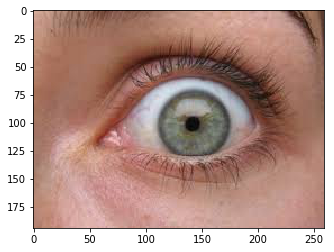

In [0]:
pred("/content/1.jpg")
z = plt.imread('/content/1.jpg') 
plt.imshow(z); 

75% open


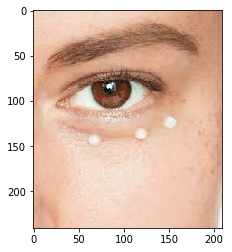

In [0]:
pred("/content/images.jpg")
z = plt.imread('/content/images.jpg') 
plt.imshow(z); 

In [0]:
pred("/content/images.jpg")
z = plt.imread('/content/images.jpg') 
plt.imshow(z);

100% open


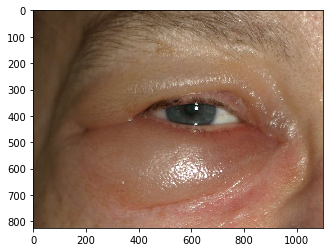

In [0]:
pred("/content/320896_1100.jpg")
z = plt.imread('/content/320896_1100.jpg')
plt.imshow(z);

In [0]:
def plot_validation_training(metric, trained_model):
  validation_metric = trained_model.history[f'val_{metric}']
  training_metric = trained_model.history[metric]
  epochs = range(len(training_metric))
  plt.plot(epochs, training_metric, 'b', label=f'Training {metric}')
  plt.plot(epochs, validation_metric, 'r', label=f'Validation {metric}')
  plt.ylim(bottom=0)
  plt.xlabel('Epochs ', fontsize=16)
  plt.ylabel(metric, fontsize=16)
  loc = 'upper right' if metric == "loss" else 'lower right'
  plt.legend(loc=loc)
  plt.title(f'Training and validation {metric}', fontsize = 20)
  plt.show()

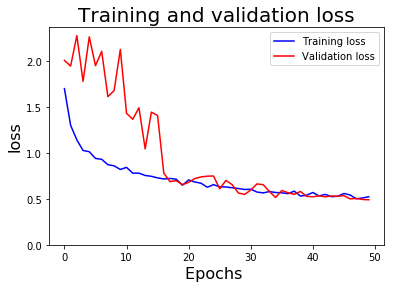

In [0]:
plot_validation_training("loss", trained_model)


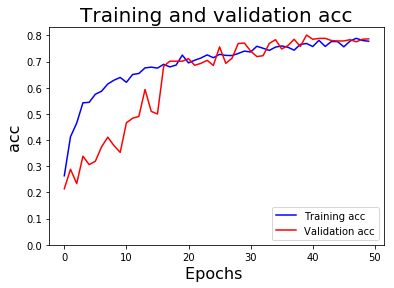

In [0]:
plot_validation_training("acc", trained_model)


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
model.load_weights('epoch=40|accuracy=0.8016.h5')

In [0]:
val_generator.reset()

In [0]:
classes_predicted = model.predict_generator(val_generator, steps=val_steps, verbose=1)

20/20 [==============================] - 1s 63ms/step


In [0]:
len(classes_predicted)

640

In [0]:
real_classes = np.argmax(classes_predicted, axis=1)

In [0]:
val_labels = val_generator.classes

In [0]:
len(val_labels)

652

In [0]:
val_labels = val_labels[:640]

In [0]:
len(val_labels), len(real_classes)

(640, 640)

In [0]:
val_generator.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

In [0]:
classes_names = ["100% open", "75% open","50% open","25% open","Closed"]

Confusion matrix, without normalization


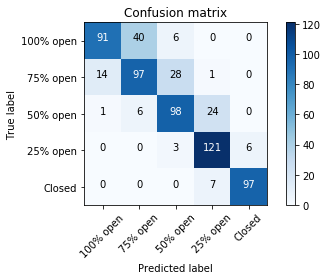

In [0]:
cm = confusion_matrix(val_labels, real_classes, labels=range(num_classes))
plot_confusion_matrix(cm, classes_names)

In [0]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f'sensitivity: {sensitivity}')

specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print(f'specifity: {specificity}')

sensitivity: 0.6946564885496184
specifity: 0.8738738738738738


In [0]:
from sklearn.metrics import classification_report

In [0]:
report = classification_report(val_labels, real_classes, target_names=classes_names)
print(report)

              precision    recall  f1-score   support

   100% open       0.86      0.66      0.75       137
    75% open       0.68      0.69      0.69       140
    50% open       0.73      0.76      0.74       129
    25% open       0.79      0.93      0.86       130
      Closed       0.94      0.93      0.94       104

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.79       640
weighted avg       0.79      0.79      0.79       640



In [0]:
!pip uninstall keras-vis

Uninstalling keras-vis-0.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras_vis-0.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/vis/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/structure.py
Proceed (y/n)? y
  Successfully uninstalled keras-vis-0.4.1


In [0]:
!pip install git+https://github.com/raghakot/keras-vis.git -U

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-9uo5quaq
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-9uo5quaq
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=90ade322b7fbfb75632d7be647c8b14de4e05e27dfe0cfa840a90afa1e9ff60e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rmtqvz_3/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis


In [0]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

In [0]:
benign_folder = os.listdir("training/1")
malignant_folder = os.listdir("training/2")
malignant_folder1 = os.listdir("training/3")
malignant_folder2 = os.listdir("training/4")
malignant_folder3 = os.listdir("training/5")

benign_folder_name = "training/1"
malignant_folder_name = "training/2"
malignant_folder_name1 = "training/3"
malignant_folder_name2 = "training/4"
malignant_folder_name3 = "training/5"

In [0]:
benign_image_path = f'{benign_folder_name}/{benign_folder[20]}'
malignant_image_path = f'{malignant_folder_name}/{malignant_folder[58]}'
malignant_image_path1 = f'{malignant_folder_name1}/{malignant_folder1[96]}'
malignant_image_path2 = f'{malignant_folder_name2}/{malignant_folder2[134]}'
malignant_image_path3 = f'{malignant_folder_name3}/{malignant_folder3[172]}'



benign_image = utils.load_img(benign_image_path, target_size=(48, 48))
malignant_image = utils.load_img(malignant_image_path, target_size=(48, 48))
malignant_image1 = utils.load_img(malignant_image_path1, target_size=(48, 48))
malignant_image2 = utils.load_img(malignant_image_path2, target_size=(48, 48))
malignant_image3 = utils.load_img(malignant_image_path3, target_size=(48, 48))

In [0]:
benign_image_model = image.load_img(benign_image_path, target_size=(48, 48))
malignant_image_model = image.load_img(malignant_image_path, target_size=(48, 48))
malignant_image_model1 = image.load_img(malignant_image_path1, target_size=(48, 48))
malignant_image_model2 = image.load_img(malignant_image_path2, target_size=(48, 48))
malignant_image_model3 = image.load_img(malignant_image_path3, target_size=(48, 48))

benign_image_model = image.img_to_array(benign_image_model)
benign_image_model = preprocess_input(benign_image_model)

malignant_image_model = image.img_to_array(malignant_image_model)
malignant_image_model = preprocess_input(malignant_image_model)

malignant_image_model1 = image.img_to_array(malignant_image_model1)
malignant_image_model1 = preprocess_input(malignant_image_model1)
malignant_image_model2 = image.img_to_array(malignant_image_model2)
malignant_image_model2 = preprocess_input(malignant_image_model2)
malignant_image_model3 = image.img_to_array(malignant_image_model3)
malignant_image_model3 = preprocess_input(malignant_image_model3)

preprocessed_images = np.array([benign_image_model, malignant_image_model,malignant_image_model1,malignant_image_model2,malignant_image_model3])

In [0]:
predictions = model.predict(preprocessed_images)
predicted_classes = np.argmax(predictions, axis=1)

In [0]:
images_array = [benign_image, malignant_image,malignant_image1,malignant_image2,malignant_image3]

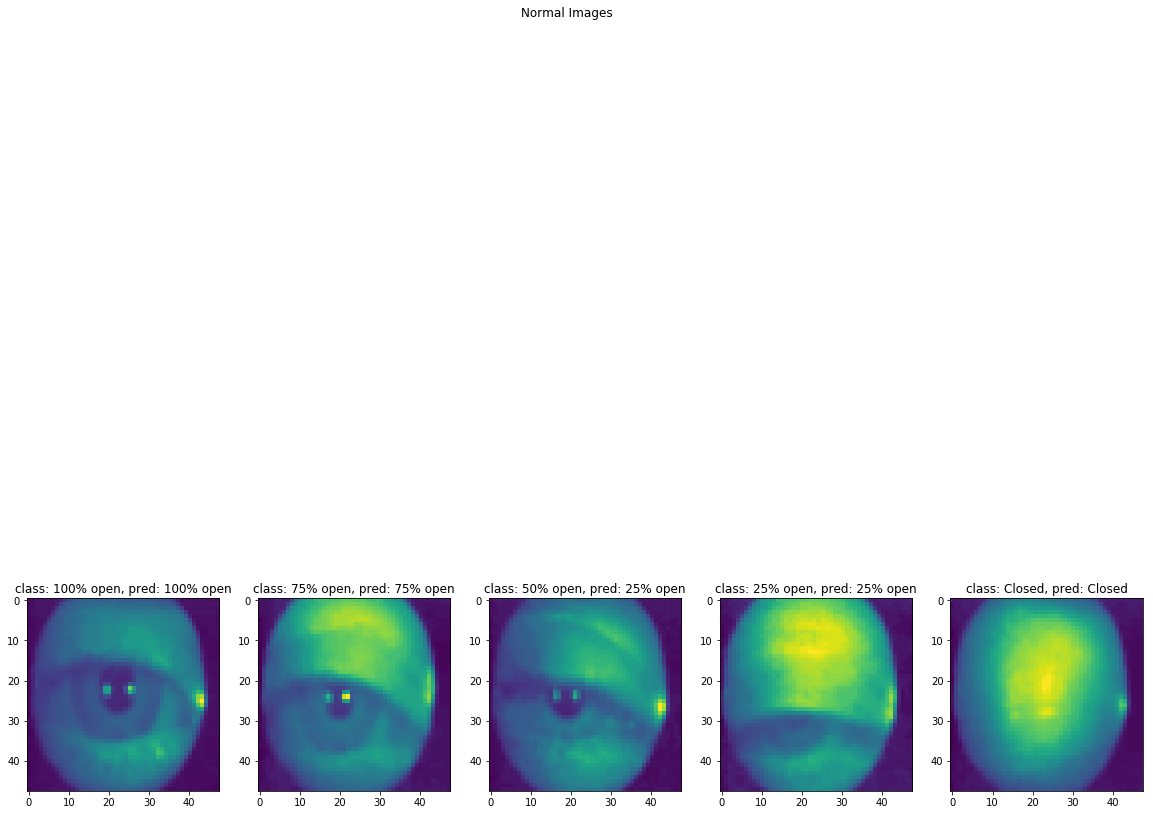

In [0]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
fig.suptitle('Normal Images')

for index, img in enumerate(images_array):   
  class_index = predicted_classes[index]
  ax[index].set_title(f'class: {classes_names[index]}, pred: {classes_names[class_index]}')
  ax[index].imshow(img)

In [0]:
layer_idx = utils.find_layer_idx(model, 'dense_2')

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
fig.suptitle('Gradient maps')

for index, img in enumerate(images_array):    
    grads = visualize_saliency(model, layer_idx, filter_indices=index, seed_input=img)
    ax[index].set_title(classes_names[index])
    ax[index].imshow(grads, cmap='jet')

ValueError: ignored

In [0]:
resnetmodel

In [0]:
!git clone https://github.com/kumar-shridhar/CNN_Architectures.git

Cloning into 'CNN_Architectures'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [0]:
!mv /content/CNN_Architectures/inception_resnet/inception_resnet_v2.py /content/

In [0]:
!mv /content/CNN_Architectures/inception_resnet/imagenet_utils.py /content/

In [0]:
from inception_resnet_v2 import InceptionResNetV2

In [0]:
PATH = "/content/"
sz=299
batch_size=32

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam, RMSprop, Nadam
#from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from keras import backend as K

In [0]:
train_data_dir = f'{PATH}training'
validation_data_dir = f'{PATH}validation'
batch_size = 32

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

Found 3272 images belonging to 5 classes.
Found 652 images belonging to 5 classes.


In [0]:
base_model= InceptionResNetV2()

W0905 19:32:34.013930 140109413365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 19:32:34.065189 140109413365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 19:32:34.074648 140109413365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 19:32:34.118605 140109413365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0905 19:32:34.120398 1401094133

225214464/225209952 [==============================] - 17s 0us/step


In [0]:
base_model= InceptionResNetV2()

In [0]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, None, None, 3 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, None, None, 3 0           batch_normalization_204[0][0]    
________________________________________________________________________________

In [0]:
inp=base_model.input
output = base_model.layers[-1].output

In [0]:
x = output
#x = GlobalAveragePooling2D()(x)
#x= BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
#x = Dropout(0.5, noise_shape=None, seed=None)(x)
#x = Dense(1024, activation='relu')(x)
#x= BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
#x = Dropout(0.5, noise_shape=None, seed=None)(x)
#x = Dense(512, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

In [0]:
model = Model(inputs=inp, outputs=predictions)
optimizer = Adam(lr=0.001)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, None, None, 3 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, None, None, 3 0           batch_normalization_204[0][0]    
____________________________________________________________________________________________

In [0]:
lr_reducer = ReduceLROnPlateau(monitor='val_acc', factor=np.sqrt(0.1),
                                    cooldown=0, patience=5, min_lr=1e-5)
#model_checkpoint= ModelCheckpoint(weights_file, monitor="val_acc", save_best_only=True,save_weights_only=True, verbose=1)
callbacks=[lr_reducer]

In [0]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=5, workers=4, callbacks=callbacks,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/5
102/102 [==============================] - 126s 1s/step - loss: 1.6070 - acc: 0.2062 - val_loss: 1.6048 - val_acc: 0.2328
Epoch 2/5
102/102 [==============================] - 105s 1s/step - loss: 1.6021 - acc: 0.2154 - val_loss: 1.5962 - val_acc: 0.2935
Epoch 3/5
102/102 [==============================] - 104s 1s/step - loss: 1.5969 - acc: 0.2598 - val_loss: 1.5895 - val_acc: 0.3419
Epoch 4/5
102/102 [==============================] - 103s 1s/step - loss: 1.5929 - acc: 0.2580 - val_loss: 1.5839 - val_acc: 0.3371
Epoch 5/5
102/102 [==============================] - 104s 1s/step - loss: 1.5889 - acc: 0.2978 - val_loss: 1.5837 - val_acc: 0.3210
CPU times: user 10min 56s, sys: 56.8 s, total: 11min 53s
Wall time: 9min 2s


In [0]:
import sys
import os
import argparse
from glob import glob

import random
from random import shuffle

import time
import datetime

from collections import Counter

# from numpy.random import seed
# seed(101)
# from tensorflow import set_random_seed
# set_random_seed(101)


import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import itertools


# import inspect
import gc

import re

from PIL import Image
import cv2

import keras

# from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

# from imgaug import augmenters as iaa
# import imgaug as ia


from keras import models
from keras.models import Model
from keras.models import Sequential


from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D


from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input


# from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop

from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy


from keras import backend as K
# K.set_image_dim_ordering('th')


from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [0]:
# Creates directory, if directory exists removes if remove parameter is set to True 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

# Removes directory, if directory exists 
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
        
    return True

def clear_directory(directory_path):
    dirs_files = os.listdir(directory_path)
    
    for item in dirs_files:
#         item_path = os.path.join(directory_path, item)
        item_path = directory_path+ item
        
        try:
            if os.path.exists(item_path):
                shutil.rmtree(item_path)
        except Exception as e:
            print(e)
            
    return True


def remove_empty_folders(path, removeRoot=True):
    if not os.path.isdir(path):
        return
    
    # remove empty subfolders
    files = os.listdir(path)
    
    if len(files):
        for f in files:
            fullpath = os.path.join(path, f)
            
            if os.path.isdir(fullpath):
                remove_empty_folders(fullpath)

    # if folder empty, delete it
    files = os.listdir(path)
    
    if len(files) == 0 and removeRoot:
        print("Removing empty folder:", path)
        os.rmdir(path)
        
        
def dir_file_count(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

In [0]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [0]:
# prints a integer for degugging
def debug(x):
    print("-"*40, x, "-"*40)

In [0]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [0]:
def get_reset_subplot_params(nrows, ncols, title=True, dpi=100):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols
    subplot_params["title"] = title

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [0]:
def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        subdir_path = image_dir+"/"+classes[i]
        subdir_files = os.listdir(subdir_path)

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
            subdir_file_path = subdir_path+ "/" + subdir_file_name

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    

def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):
    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = plt.imread(img_filepath)
        
        if subplot_params["title"]:
            plt.title(img_filepath.split("/")[-1])
            
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        
        plt.imshow(img, aspect="auto")
        
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()
    
    
def show_class_sample_images(directory, image_count_per_category=5, ncols=5, title=False, save=False, dpi=100, update_image=False):
    nrows = image_count_per_category//ncols+1 if image_count_per_category%ncols else image_count_per_category//ncols
    
    class_count = len(os.listdir(directory))
    
    print("Number of Class: ", class_count)
    
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=nrows, ncols=ncols, title=title, dpi=dpi)
        
        print("%s%s%s"%("-"*55, name_correct(class_name), "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
        
    print("%s%s%d%s"%("-"*55, "All Class Printed:", class_count, "-"*55))

In [0]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        
        file_count = len(os.listdir(current_directory))
        
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
        
    sns.barplot(x=x, y=y)
    
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

In [0]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    if model:
        try:
            del model
        except:
            return False
    
    tf.reset_default_graph()
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks 
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint = None
    reduce_lr = None
    early_stopping = None
    tensorboard = None


In [0]:
reset_graph()
reset_callbacks()

In [0]:
!mkdir output/figures

In [0]:
!mkdir result && mkdir sample

In [0]:
cd ..

/content


In [0]:
# Configure input/ output directory
# Configure training, validation, testing directory

input_directory = r"/content/"
output_directory = r"/content/output/"

training_dir = input_directory + r"training"
validation_dir = input_directory + r"validation"
testing_dir = input_directory + r"testing"


figure_directory = "/content/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

Number of Class:  5
------------------------------------------------------- -------------------------------------------------------


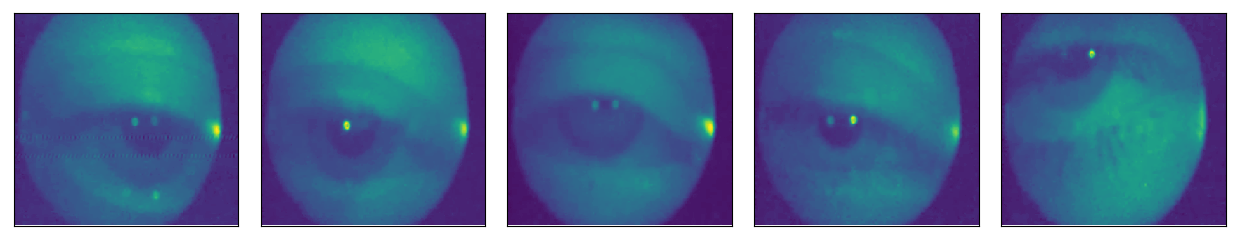


------------------------------------------------------- -------------------------------------------------------


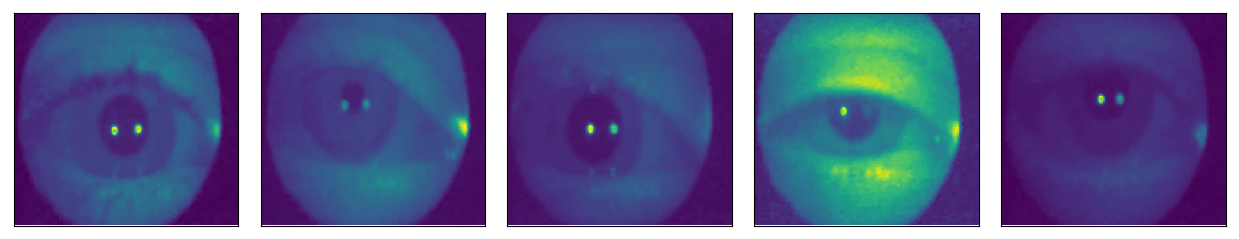


------------------------------------------------------- -------------------------------------------------------


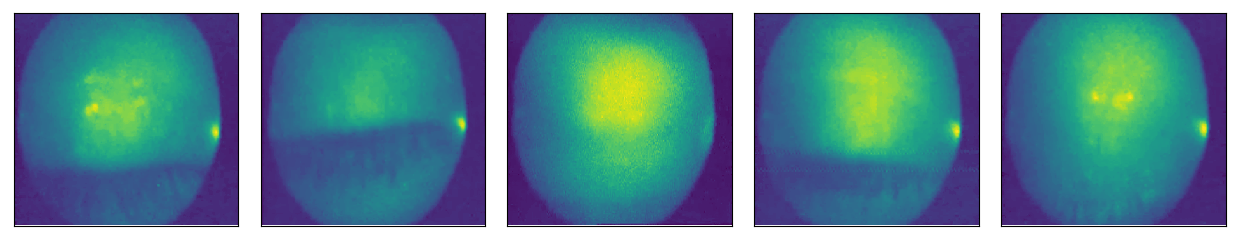


------------------------------------------------------- -------------------------------------------------------


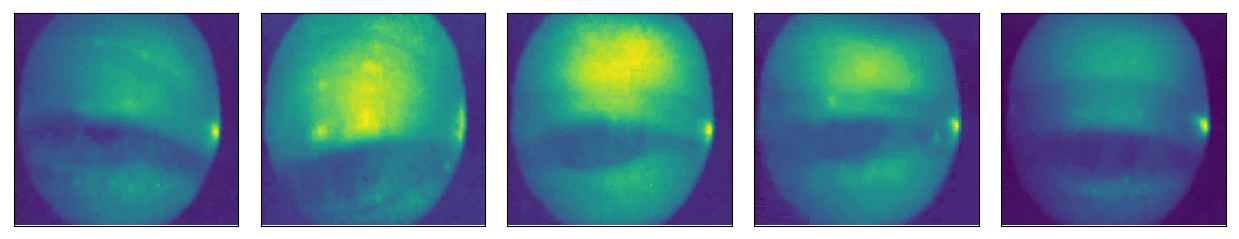


------------------------------------------------------- -------------------------------------------------------


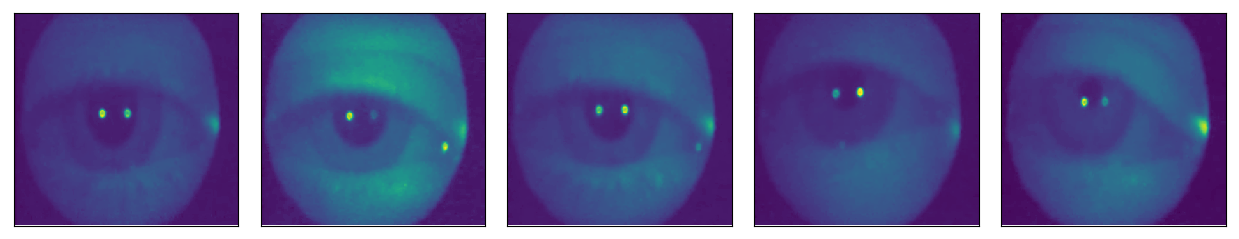


-------------------------------------------------------All Class Printed:5-------------------------------------------------------


In [0]:
show_class_sample_images(training_dir, image_count_per_category=5, ncols=5, title=False, save=False, dpi=100, update_image=False)

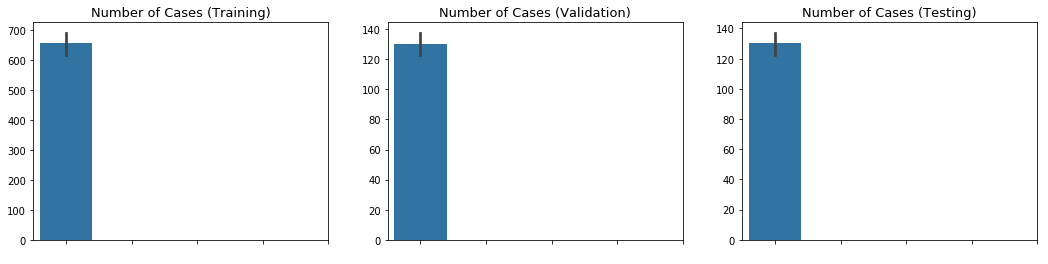

In [0]:
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = "Number of Cases"

plot_params['subplot'] = 131

show_train_val_test(training_dir, validation_dir, testing_dir, plot_params)

In [0]:
classes = os.listdir(training_dir)
classes.reverse()
# classes=['Normal', 'Cancer']
# classes = [name_correct(i) for i in classes]
classes

['2', '4', '5', '1', '3']

In [0]:
# class_mode = "binary"
# target_size = (150, 150)
# color_mode = "rgb"


rescale = 1.0/255

# target_size = (299, 299)
target_size = (96, 96)

class_mode = "categorical"

batch_size = 32
#batch_size = 128
train_batch_size = batch_size
val_batch_size = batch_size
test_batch_size = batch_size


train_shuffle = True
val_shuffle = True
test_shuffle = False


train_datagen = ImageDataGenerator(
    rescale=rescale)


train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=train_shuffle)


validation_datagen = ImageDataGenerator(rescale=rescale)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=val_batch_size,
    shuffle=val_shuffle)


test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=test_batch_size,
    shuffle=test_shuffle)

Found 3272 images belonging to 5 classes.
Found 652 images belonging to 5 classes.
Found 652 images belonging to 5 classes.


In [0]:
def get_weight(y):
    class_weight_current =  class_weight.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [0]:
class_weight = get_weight(train_generator.classes)
class_weight

array([0.93219373, 1.00368098, 1.13022453, 0.94430014, 1.0130031 ])

In [0]:
reset_graph()
reset_callbacks()

In [0]:
!mkdir output/models && mkdir output/logs

In [0]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"


clear_directory(main_log_dir)
remove_empty_folders(main_model_dir, False)


model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

In [0]:
print("Settting Callbacks at ", date_time(1))

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)


tensorboard = TensorBoard(
    log_dir=log_dir,
    update_freq='batch')


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1,
    min_lr=0.000000001)

progbar_logger = keras.callbacks.ProgbarLogger(count_mode='steps')

#-----------------------------------------------------------------------------------------------------------------#
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
callbacks = [checkpoint, early_stopping, tensorboard]
#-----------------------------------------------------------------------------------------------------------------#
print("Setted Callbacks at ", date_time(1))

Settting Callbacks at  Timestamp: 2019-09-05 20:05:09
Setted Callbacks at  Timestamp: 2019-09-05 20:05:10


In [0]:
def get_conv_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,96,96)))
    model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2 , activation='softmax'))


    print(model.summary())
    
    return model

In [0]:
def get_model_nasnet():
    inputs = Input((96, 96, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(96, 96, 3))
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(5, activation="softmax", name="3_")(out)
    model = Model(inputs, out)
    model.summary()

    return model

In [0]:
from keras.applications.nasnet import NASNetLarge as PTModel, preprocess_input

def get_model_nasnet2():
    inputs = Input((96, 96, 3))
    base_model = NASNetLarge(include_top=False, input_shape=(96, 96, 3))
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(5, activation="softmax", name="3_")(out)
    model = Model(inputs, out)
    model.summary()

    return model

In [0]:
def get_model_nasnet3():
    inputs = Input((96, 96, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(224, 224, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    out = Dense(5, activation="softmax")(x)
    model = Model(inputs, out)
    model.summary()

    return model

In [0]:
reset_graph()
print("Getting Base Model", date_time(1))
# model_nasnet = get_model_nasnet()
# model_nasnet2 = get_model_nasnet2()
model_nasnet3 = get_model_nasnet3()
# model = get_model()
print("Got Base Model", date_time(1))

Getting Base Model Timestamp: 2019-09-05 20:10:04
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
NASNet (Model)               multiple                  4269716   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1056)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1056)              4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5285      
Total params: 4,279,225
Trainable params: 4,240,375
Non-trainable params: 3

In [0]:
model = model_nasnet3

In [0]:
start_time = time.time()
print("Starting Trainning Model", date_time(1))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# steps_per_epoch = 20
# validation_steps = 5

epochs = 20


loss='categorical_crossentropy'
# metrics=['accuracy']

model.compile(optimizer=Adam(0.0001), loss=loss, metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    verbose=2,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight=class_weight)


elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
# print("Elapsed Time/Epoch: " + elapsed_time/epochs)
print("Completed Model Trainning", date_time(1))

Starting Trainning Model Timestamp: 2019-09-05 20:28:46
Epoch 1/20
 - 96s - loss: 0.1972 - acc: 0.9272 - val_loss: 0.2545 - val_acc: 0.9126
Epoch 2/20
 - 45s - loss: 0.1858 - acc: 0.9393 - val_loss: 0.1557 - val_acc: 0.9433
Epoch 3/20
 - 45s - loss: 0.1677 - acc: 0.9433 - val_loss: 0.1819 - val_acc: 0.9448
Epoch 4/20
 - 45s - loss: 0.1314 - acc: 0.9515 - val_loss: 0.1161 - val_acc: 0.9663
Epoch 5/20
 - 45s - loss: 0.1360 - acc: 0.9527 - val_loss: 0.1336 - val_acc: 0.9494
Epoch 6/20
 - 45s - loss: 0.1548 - acc: 0.9487 - val_loss: 0.1890 - val_acc: 0.9264
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping

Elapsed Time: 00:06:54
Completed Model Trainning Timestamp: 2019-09-05 20:35:41


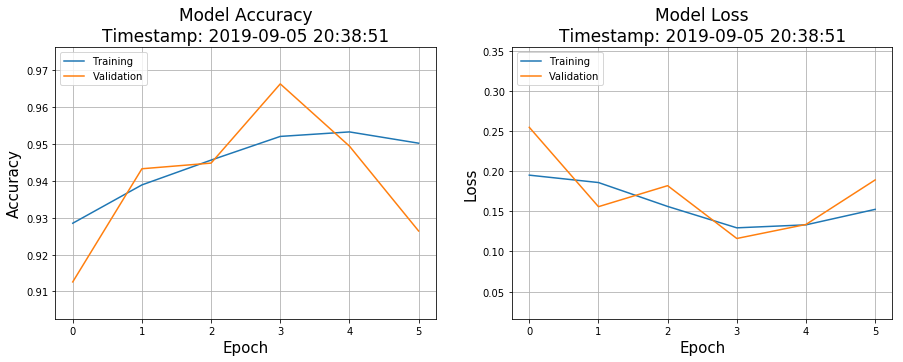

In [0]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]


plt.figure(figsize=(15, 5))

# Plot training & validation Accuracy values

y1 = history.history['acc']
y2 = history.history['val_acc']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]


plt.subplot(121)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()

                         
# Plot training & validation loss values
    
y1 = history.history['loss']
y2 = history.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
    
plt.subplot(122)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Loss\n'+date_time(1), fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
plt.savefig(figure_directory+"/history")
                    
plt.show()

In [0]:
import pickle

def save_history_result(history, filename):
    history_dict = {}
    history_dict['acc'] = history.history['acc']
    history_dict['val_acc'] = history.history['val_acc']

    history_dict['loss'] = history.history['loss']
    history_dict['val_loss'] = history.history['val_loss']

    with open(history_file, 'wb') as handle:
        pickle.dump(history_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

        
history_file = model_dir+'history.pickle'
save_history_result(history, history_file)
with open(history_file, 'rb') as handle:
    history_dict = pickle.load(handle)

print(history_dict)

{'acc': [0.9284841075794621, 0.9388753056234719, 0.94559902200489, 0.9520171149144254, 0.953239608801956, 0.9501833740831296], 'val_acc': [0.9125766871165644, 0.943251534108004, 0.944785275707947, 0.9662576687116564, 0.9493865030674846, 0.9263803680981595], 'loss': [0.1949612417401778, 0.1857624341777018, 0.15600875143899895, 0.12936583025640555, 0.13309430195733649, 0.15236401186304163], 'val_loss': [0.2545198512954946, 0.15570569742310997, 0.18186773003244694, 0.11610299186563931, 0.13356825172261227, 0.18901270362291417]}


In [0]:
dir_name = r"/content/output/models/"
dirs = os.listdir(dir_name)
for i in range(len(dirs)):
    print(i, dirs[i])

0 2019-09-05 20-04-45


In [0]:
cur_dir =dir_name+dirs[0]+"/"
model_names = os.listdir(cur_dir)
for i in range(len(model_names)):
    print(i, model_names[i])

0 01-val_acc-0.69-val_loss-0.84.hdf5
1 02-val_acc-0.78-val_loss-0.64.hdf5
2 01-val_acc-0.81-val_loss-0.52.hdf5
3 10-val_acc-0.97-val_loss-0.10.hdf5
4 04-val_acc-0.89-val_loss-0.32.hdf5
5 05-val_acc-0.89-val_loss-0.28.hdf5
6 03-val_acc-0.85-val_loss-0.40.hdf5
7 history.pickle
8 07-val_acc-0.94-val_loss-0.18.hdf5


In [0]:
model_file = cur_dir+model_names[0]

print(model_file)

/content/output/models/2019-09-05 20-04-45/01-val_acc-0.69-val_loss-0.84.hdf5


In [0]:
model = keras.models.load_model(model_file)

AttributeError: ignored

In [0]:
test_batch_size = 32
test_shuffle = False

test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=test_batch_size,
    shuffle=test_shuffle)

Found 652 images belonging to 5 classes.


In [0]:
print("Results")
print("-"*80)
# nsteps = 100
nsteps = len(test_generator)

generator = test_generator

result  = model.evaluate_generator(generator, steps=nsteps, verbose=2)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

Results
--------------------------------------------------------------------------------
Loss     : 0.12  
Accuracy : 96.63%


In [0]:
print("results")
# nsteps = 100
nsteps = len(test_generator)
y_pred = model.predict_generator(test_generator, steps=nsteps, verbose=2)  
y_pred = y_pred.argmax(axis=-1)

results


In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [0]:
# get true labels for a number of batches 
# batch shuffle causes natural index of true labels in generator.classes to be changed
# original = [1,0,1,0,1,0] shuffled = [0,1,0,1,1,0], hence original class order cannot be found from generator.classes
# to stop index class missidentification, batch size of 1 or total sample size can be used in test data generator
def get_true_labels_batch(generator, nsteps=len(generator)):
    y_true = []
    
    for i in range(nsteps):
        img, class_ind = generator[i]
        y_true.append(class_ind.argmax(axis=-1)) 
    
    y_true = [item for sublist in y_true for item in sublist]
    y_true = np.array(y_true)
    
    return y_true

In [0]:
# nsteps = 100
nsteps = len(test_generator)

y_true = get_true_labels_batch(generator, nsteps=nsteps)

In [0]:
len(y_true)

652

------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 96.63%
Recall        : 96.63%
F1-Score      : 96.63%
------------------------------------------------------------------------------------------





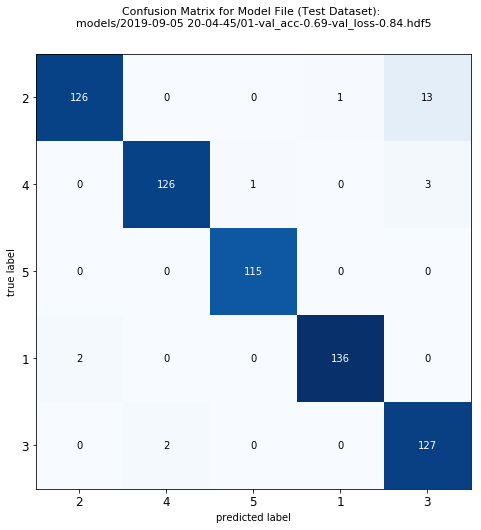




------------------------------------------------------------------------------------------
Report for Model File:  models/2019-09-05 20-04-45/01-val_acc-0.69-val_loss-0.84.hdf5
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.90      0.94       140
           4       0.98      0.97      0.98       130
           5       0.99      1.00      1.00       115
           1       0.99      0.99      0.99       138
           3       0.89      0.98      0.93       129

    accuracy                           0.97       652
   macro avg       0.97      0.97      0.97       652
weighted avg       0.97      0.97      0.97       652

------------------------------------------------------------------------------------------


In [0]:

image_file_name_CM = figure_directory+"/CM"

title = model_file.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred,average='micro') 
recall = recall_score(y_true, y_pred,average='micro') 
f1 = f1_score(y_true, y_pred,average='micro') 


print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))

print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=11)
fig.savefig(image_file_name_CM, dpi=100)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

In [0]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = len(y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 18
-----------------------------------
Batch Size              : 32
-----------------------------------
Accuracy                : 96.63%
-----------------------------------


In [0]:
def show_predictions(y_img_batch, y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test_generator.filenames
    m = {}
    length = len(y_true)
    plt.title(date_time(1))
    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = plt.imread(testing_dir+"/"+ file_names[num])
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')
            

        if plot_params["update_image"] and os.path.exists(image_file_name):
            os.remove(image_file_name)   

        fig.savefig(image_file_name, dpi=subplot_params["dpi"])

    plt.tight_layout()
    plt.show()

In [0]:
image_file_name_batch = figure_directory+"/result/"
image_file_name_sample = figure_directory+"/sample"

batch_size_t = len(y_true_batch)

class_map = {v: k for k, v in test_generator.class_indices.items()}


dpi=100


ncols = 8
# ncols = batch_size_t if batch_size_t<ncols else ncols     
# nrows = batch_size_t/ncols
# nrows = int(batch_size_t/ncols)+1 if batch_size_t%ncols else  int(batch_size_t/ncols)
nrows = 4

count = ncols*nrows


subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()

IsADirectoryError: ignored

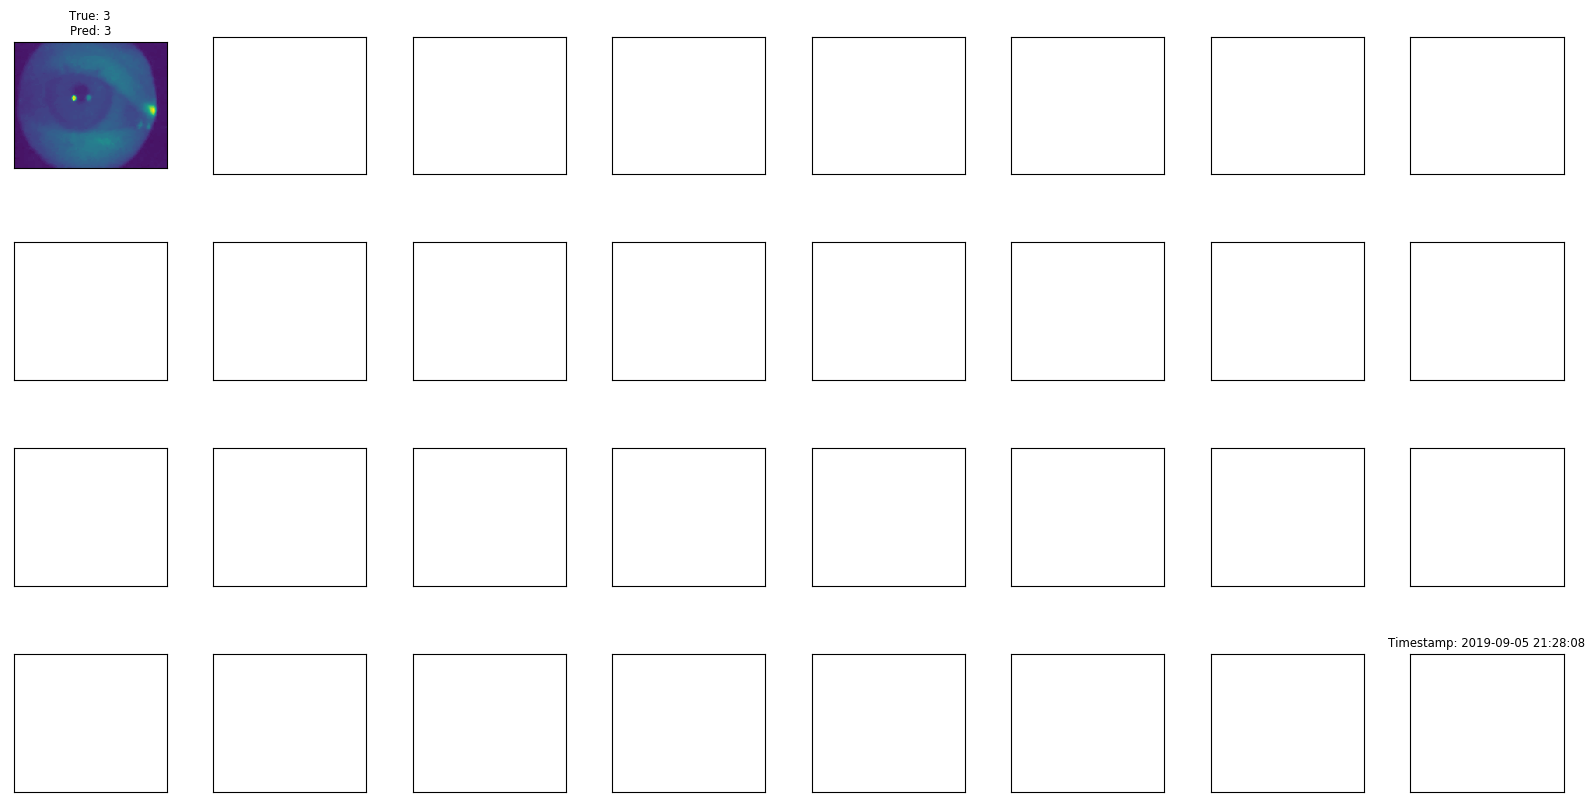

In [0]:
show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_batch, count=count, sample=True)

IsADirectoryError: ignored

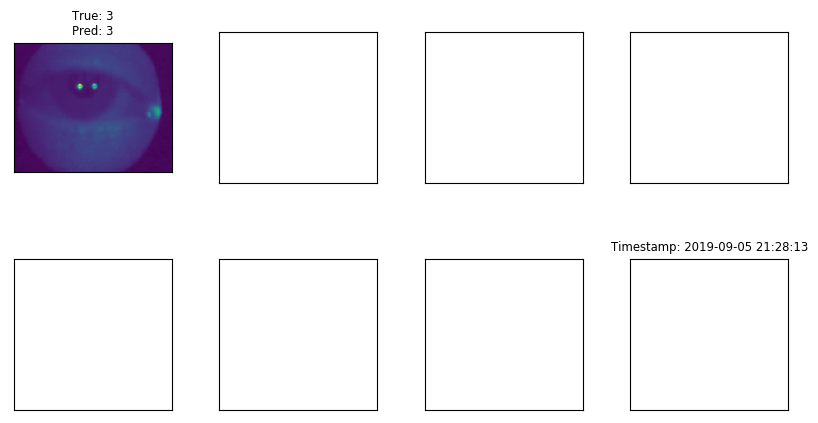

In [0]:
ncols = 4
nrows = 2

if batch_size_t<4:
    cols = 1
    
count = ncols*nrows
    

subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()


show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_sample, count=count, sample=True)

In [0]:
# Configure input/ output directory
# Configure training, validation, testing directory


testing_dir_main = input_directory + r"testing"

test_batch_size = 32
test_main_shuffle = False
class_mode = None

test_datagen_main = ImageDataGenerator(rescale=rescale)

test_generator_main = test_datagen_main.flow_from_directory(
    testing_dir_main,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=test_batch_size,
    shuffle=test_main_shuffle)

Found 652 images belonging to 5 classes.


In [0]:
nsteps = len(test_generator_main)
y_pred = model.predict_generator(test_generator_main, steps=nsteps, verbose=1)

21/21 [==============================] - 2s 106ms/step


In [0]:
y_pred

array([[1.6191494e-01, 3.9933147e-03, 7.7317026e-04, 8.1283504e-01,
        2.0483525e-02],
       [2.6284193e-04, 1.3243782e-05, 3.8646260e-05, 9.9965370e-01,
        3.1522613e-05],
       [2.8736438e-03, 5.8455407e-06, 1.8619552e-03, 9.9517643e-01,
        8.2120489e-05],
       ...,
       [1.0348882e-08, 3.7324673e-06, 9.9999583e-01, 1.4291071e-07,
        3.3562392e-07],
       [2.9532766e-04, 7.1692280e-04, 9.9887246e-01, 2.8189754e-05,
        8.7029854e-05],
       [1.0110824e-03, 6.9611825e-02, 9.2603177e-01, 8.5053535e-04,
        2.4947824e-03]], dtype=float32)

In [0]:
y_pred2 = y_pred.argmax(axis=-1)

In [0]:
test_file_names = test_generator_main.filenames

rows = []

for i in range(len(test_file_names)):
    rows.append([test_file_names[i].split("\\")[0][:-4], y_pred2[i]])
    
    
result = pd.DataFrame(rows, columns=["id", "label"])

In [0]:
result_directory = "/content/output/result"

if os.path.exists(result_directory):
    shutil.rmtree(result_directory)
os.mkdir(result_directory)
    
submission_csv = result_directory+r"/submission.csv"   

result.to_csv(submission_csv, index=None)